In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [2]:
train = pd.read_csv("emnist-balanced-train.csv",delimiter = ',')
test = pd.read_csv("emnist-balanced-test.csv", delimiter = ',')

In [3]:
HEIGHT = 28
WIDTH = 28

In [4]:


# Split x and y
train_x = train.iloc[:,1:]
train_y = train.iloc[:,0]
del train

test_x = test.iloc[:,1:]
test_y = test.iloc[:,0]
del test

In [5]:
def rotate(image):
    image = image.reshape([HEIGHT, WIDTH])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

In [6]:
# Flip and rotate image
train_x = np.asarray(train_x)
train_x = np.apply_along_axis(rotate, 1, train_x)
test_x = np.asarray(test_x)
test_x = np.apply_along_axis(rotate, 1, test_x)

In [7]:
# Normalise
train_x = train_x.astype('float32')
train_x /= 255
test_x = test_x.astype('float32')
test_x /= 255

In [8]:
# number of classes
num_classes = train_y.nunique()

In [9]:
# One hot encoding
train_y = np_utils.to_categorical(train_y, num_classes)
test_y = np_utils.to_categorical(test_y, num_classes)

In [10]:
# partition to train and val
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size= 0.10, random_state=7)

In [11]:
# Reshape image for CNN
train_x = train_x.reshape(-1, HEIGHT, WIDTH, 1)
test_x = test_x.reshape(-1, HEIGHT, WIDTH, 1)

In [12]:
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu', input_shape=(HEIGHT, WIDTH,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

# model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=10, batch_size=512, verbose=1, validation_data=(val_x, val_y))

Epoch 1/10
199/199 [==============================] - 207s 1s/step - loss: 1.3135 - accuracy: 0.6238 - val_loss: 0.6602 - val_accuracy: 0.7822
Epoch 2/10
199/199 [==============================] - 205s 1s/step - loss: 0.5652 - accuracy: 0.8136 - val_loss: 0.5131 - val_accuracy: 0.8271
Epoch 3/10
199/199 [==============================] - 208s 1s/step - loss: 0.4696 - accuracy: 0.8411 - val_loss: 0.4602 - val_accuracy: 0.8388
Epoch 4/10
199/199 [==============================] - 205s 1s/step - loss: 0.4227 - accuracy: 0.8549 - val_loss: 0.4247 - val_accuracy: 0.8516
Epoch 5/10
199/199 [==============================] - 180s 906ms/step - loss: 0.3888 - accuracy: 0.8655 - val_loss: 0.4065 - val_accuracy: 0.8530
Epoch 6/10
199/199 [==============================] - 172s 865ms/step - loss: 0.3689 - accuracy: 0.8720 - val_loss: 0.4022 - val_accuracy: 0.8587
Epoch 7/10
199/199 [==============================] - 173s 868ms/step - loss: 0.3491 - accuracy: 0.8771 - val_loss: 0.3897 - val_accurac

In [13]:
# plot accuracy and loss
def plotgraph(epochs, acc, val_acc, type):
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    if (type == "Accuracy"):
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
    else:
        plt.title('Model loss')
        plt.ylabel('Loss')
    plt.show()

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

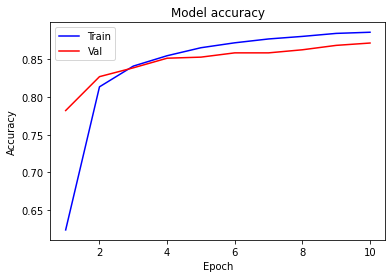

In [15]:
plotgraph(epochs, acc, val_acc, "Accuracy")

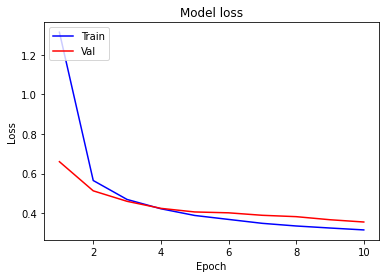

In [16]:
# loss curve
plotgraph(epochs, loss, val_loss, "Loss")

In [17]:
score = model.evaluate(test_x, test_y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.36832985281944275
Test accuracy: 0.8748337626457214
